This Notebook is for customer churn data from IDM. 

# Customer Churn Analysis for IDM

This notebook analyzes customer churn data from IDM using the Telco Customer Churn dataset. It includes data exploration, visualization, preprocessing, and the application of various machine learning models to predict customer churn. The goal is to gain insights into the factors influencing churn and to build predictive models for effective customer retention strategies.

In [198]:
pip install plotly xgboost lightgbm shap yellowbrick statsmodels missingno catboost altair


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [199]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [201]:
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

The dataset is loaded into a pandas DataFrame from the CSV file 'WA_Fn-UseC_-Telco-Customer-Churn.csv'. This dataset contains information about IDM's customers, including demographic details, account information, services subscribed, and whether the customer has churned. The DataFrame `df` has 7043 rows and 21 columns, with features such as gender, tenure, contract type, payment method, and churn status.

In [202]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [204]:
df.shape

(7043, 21)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [206]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [207]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [208]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [209]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [210]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [211]:
(df['tenure'] == 0).sum()

np.int64(11)

In [212]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [213]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [215]:
columns = df.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

print("\n******************* Categorical field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

******************* Numeric field *******************

unique number of tenure -> 72
unique number of MonthlyCharges -> 1584
unique number of TotalCharges -> 6530

******************* Categorical field *******************

unique number of gender -> 2
unique number of SeniorCitizen -> 2
unique number of Partner -> 2
unique number of Dependents -> 2
unique number of PhoneService -> 2
unique number of MultipleLines -> 3
unique number of InternetService -> 3
unique number of OnlineSecurity -> 3
unique number of OnlineBackup -> 3
unique number of DeviceProtection -> 3
unique number of TechSupport -> 3
unique number of StreamingTV -> 3
unique number of StreamingMovies -> 3
unique number of Contract -> 3
unique number of PaperlessBilling -> 2
unique number of PaymentMethod -> 4
unique number of Churn -> 2


In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [217]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [218]:
sns.set(style = 'white')
import os

<Axes: >

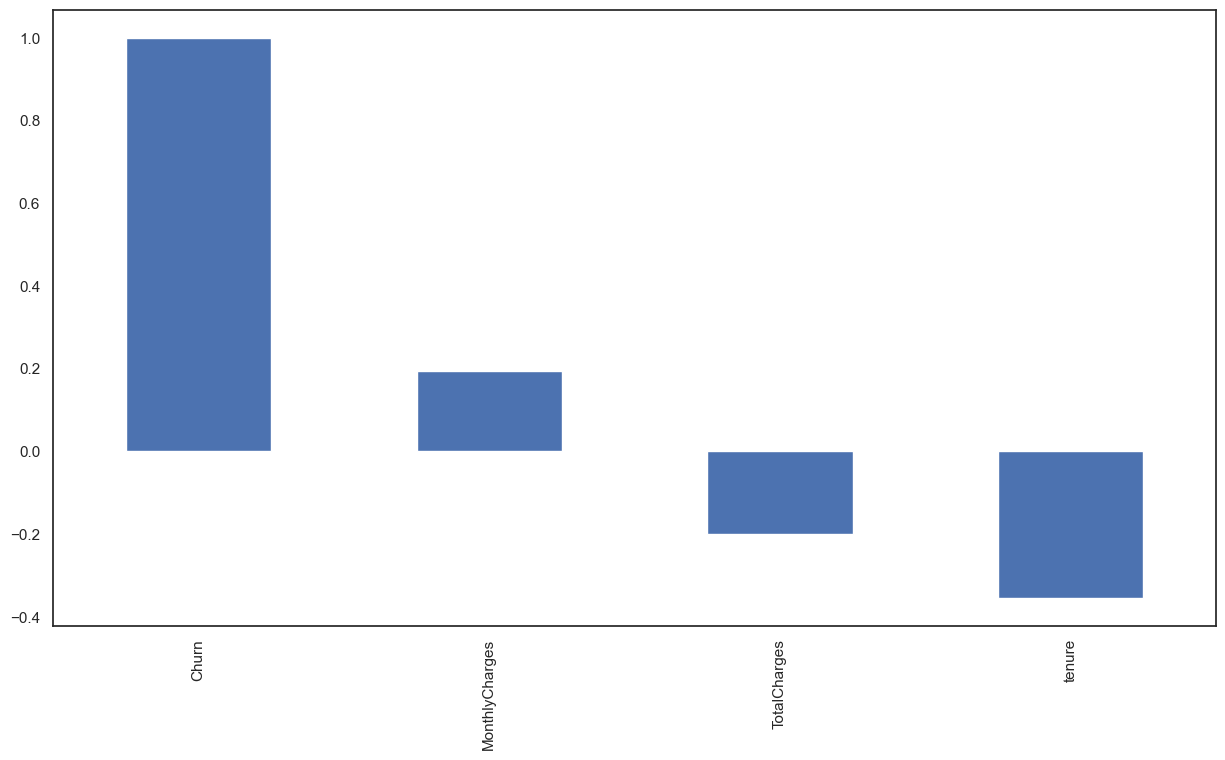

In [219]:
# Convert 'Churn' to numeric for correlation calculation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
numeric_cols.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [220]:
fig = px.histogram(df, x="Churn", color="Churn", title="Customer Churn Count", barmode='group')
fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.update_layout(
  xaxis_title="Churn",
  yaxis_title="Count",
  showlegend=False,
  bargap=0.4,
  width=1000,
  height=500
)
fig.show()

print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [221]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [222]:
# Filter for churned and non-churned customers using string values
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Percentage of male and female in churn=yes group
gender_churn_yes_counts = churn_yes['gender'].value_counts()
gender_churn_yes_percentages = gender_churn_yes_counts / len(churn_yes) * 100

print("Percentage of Male and Female in Churn=Yes group:")
print(gender_churn_yes_percentages)

print("\n" + "="*30 + "\n") # Separator

# Percentage of male and female in churn=no group
gender_churn_no_counts = churn_no['gender'].value_counts()
gender_churn_no_percentages = gender_churn_no_counts / len(churn_no) * 100

print("Percentage of Male and Female in Churn=No group:")
print(gender_churn_no_percentages)

Percentage of Male and Female in Churn=Yes group:
gender
Female    50.24077
Male      49.75923
Name: count, dtype: float64


Percentage of Male and Female in Churn=No group:
gender
Male      50.726322
Female    49.273678
Name: count, dtype: float64


In [223]:
# Calculate the total number of male and female customers
total_male = df[df['gender'] == 'Male'].shape[0]
total_female = df[df['gender'] == 'Female'].shape[0]

# Calculate the number of churned male and female customers
churned_male = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0]
churned_female = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0]

# Calculate the churn percentage for male and female customers
churn_percentage_male = (churned_male / total_male) * 100
churn_percentage_female = (churned_female / total_female) * 100

print(f"{churn_percentage_male:.2f}% male customers actually churned")
print(f"{churn_percentage_female:.2f}% female customers actually churned")

26.20% male customers actually churned
26.96% female customers actually churned


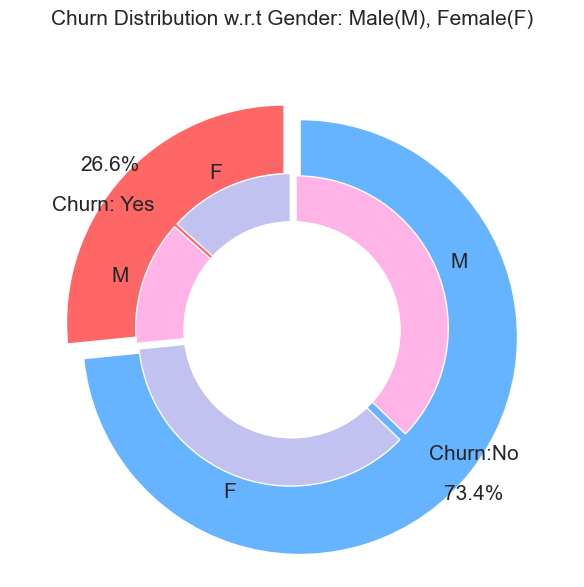

In [224]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.5,0.5)
explode_gender = (0.2,0.2,0.2,0.2)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [225]:
contract_churn_percentage = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [226]:
# Filter for month-to-month customers who churned
mtm_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]

# Calculate the average tenure (lifetime in months)
average_lifetime_mtm_churned = mtm_churned['tenure'].mean()
print(f"Average lifetime (in months) of month-to-month customers who churned: {average_lifetime_mtm_churned:.2f}")

Average lifetime (in months) of month-to-month customers who churned: 14.02


In [227]:
# Calculate average monthly charges for each contract type
avg_monthly_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].mean()
print("Average Monthly Charges by Contract Type:")
print(avg_monthly_charges_by_contract)

Average Monthly Charges by Contract Type:
Contract
Month-to-month    66.398490
One year          65.079416
Two year          60.872374
Name: MonthlyCharges, dtype: float64


In [228]:
avg_monthly_charges_mtm_churned = mtm_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who churned: {avg_monthly_charges_mtm_churned:.2f}")

Average Monthly Charges for month-to-month customers who churned: 73.02


In [229]:
# Filter for month-to-month customers who churned and have MonthlyCharges > 65.08
mtm_churned_high_cost = df[(df['Contract'] == 'Month-to-month') & 
               (df['Churn'] == 'Yes') & 
               (df['MonthlyCharges'] >69)] 

# Total month-to-month customers
total_mtm = df[df['Contract'] == 'Month-to-month'].shape[0]

# Percentage calculation
percentage = (mtm_churned_high_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: {percentage:.2f}%")

Percentage of month-to-month contract customers who churned and whose monthly cost is more than 65.08: 30.12%


In [230]:
# Filter for month-to-month customers who did not churn
mtm_not_churned = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'No')]

# Calculate the average monthly charges
avg_monthly_charges_mtm_not_churned = mtm_not_churned['MonthlyCharges'].mean()
print(f"Average Monthly Charges for month-to-month customers who did not churn: {avg_monthly_charges_mtm_not_churned:.2f}")

Average Monthly Charges for month-to-month customers who did not churn: 61.46


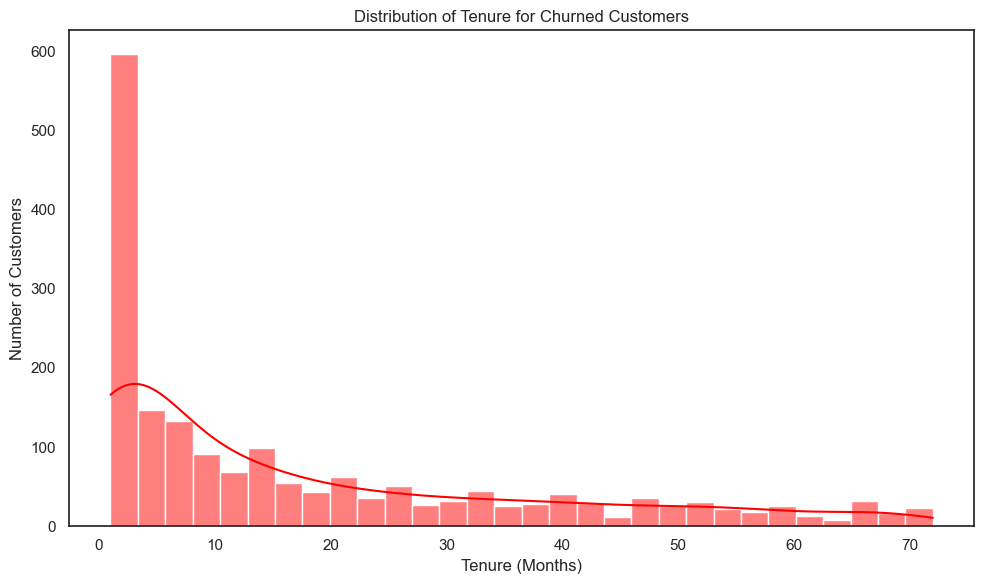

In [231]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_yes['tenure'], bins=30, kde=True, color='red')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [232]:
tenure_counts = df['tenure'].value_counts().sort_index()  # sort so it appears in order
# Create a DataFrame for plotting
tenure_df = pd.DataFrame({
    'Tenure': tenure_counts.index,
    'CustomerCount': tenure_counts.values
})

# Create bar plot
fig = px.bar(
    tenure_df,
    x='Tenure',
    y='CustomerCount',
    labels={'Tenure': 'Customer Tenure (in months)', 'CustomerCount': 'Number of Customers'},
    title='Customer Distribution by Tenure',
    text_auto=True
)

fig.update_layout(
    #xaxis=dict(tickmode='linear'),
    width=1400,
    height=500
)

fig.show()

In [233]:
month_to_month_df = df[df['Contract'] == 'Month-to-month']
fig = px.histogram(
    month_to_month_df,
    x='tenure',
    nbins=30,
    title='Distribution of Tenure for Month-to-Month Contract Customers',
    labels={'tenure': 'Tenure (in months)', 'count': 'Number of Customers'},
    color_discrete_sequence=['#636EFA']
)

fig.update_layout(
    bargap=0.1,
    width=800,
    height=500
)

fig.show()

In [234]:
# Filter for month-to-month customers who churned with tenure <= 12 months
mtm_churned_early = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Calculate the percentage
percentage_early_churn = (mtm_churned_early.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 12 months tenure: {percentage_early_churn:.2f}%")

Percentage of month-to-month customers who churned at or before 12 months tenure: 26.43%


In [235]:
# Filter for month-to-month customers who churned with tenure <= 24 months
mtm_churned_24 = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 24)]

# Calculate the percentage
percentage_churn_24 = (mtm_churned_24.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned at or before 24 months tenure: {percentage_churn_24:.2f}%")

Percentage of month-to-month customers who churned at or before 24 months tenure: 33.60%


In [236]:
# Filter for month-to-month customers who churned and have MonthlyCharges < 60.87
mtm_churned_low_cost = df[(df['Contract'] == 'Month-to-month') & 
              (df['Churn'] == 'Yes') & 
              (df['MonthlyCharges'] < 60.87)]

# Percentage calculation
percentage_low_cost = (mtm_churned_low_cost.shape[0] / total_mtm) * 100

print(f"Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: {percentage_low_cost:.2f}%")

Percentage of month-to-month customers who churned and whose monthly cost is less than 60.87: 11.77%


In [237]:
# Calculate the percentage of customers by contract type
contract_counts = df['Contract'].value_counts(normalize=True) * 100
print("Percentage of customers by contract type:")
print(contract_counts)

Percentage of customers by contract type:
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


In [238]:
# Step 1: Filter month-to-month churned customers who left within 12 months
churned_mtm_12 = df[
    (df['Contract'] == 'Month-to-month') &
    (df['Churn'] == 'Yes') &
    (df['tenure'] <= 12)
].copy()

# Calculate revenue for each
churned_mtm_12['revenue'] = churned_mtm_12['tenure'] * churned_mtm_12['MonthlyCharges']

# Total and average revenue
total_revenue_churned_mtm_12 = churned_mtm_12['revenue'].sum()
avg_revenue_churned_mtm_12 = churned_mtm_12['revenue'].mean()
num_customers_churned_mtm_12 = churned_mtm_12.shape[0]

print(f"Churned month-to-month customers within 12 months: {num_customers_churned_mtm_12}")
print(f"Total revenue from them: ${total_revenue_churned_mtm_12:.2f}")
print(f"Average revenue per churned customer: ${avg_revenue_churned_mtm_12:.2f}")


Churned month-to-month customers within 12 months: 1024
Total revenue from them: $293412.00
Average revenue per churned customer: $286.54


In [239]:
# Step 2: One-year contract customers who did NOT churn and had full tenure (assume full = 12 months+)
one_year_full = df[
    (df['Contract'] == 'One year') &
    (df['tenure'] >= 12)
].copy()

# Revenue = 12 * monthly charges (assuming they stayed 12 months)
one_year_full['revenue'] = 12 * one_year_full['MonthlyCharges']

# Total and average revenue
total_revenue_one_year = one_year_full['revenue'].sum()
avg_revenue_one_year = one_year_full['revenue'].mean()
num_customers_one_year = one_year_full.shape[0]

print(f"One-year customers (12+ months): {num_customers_one_year}")
print(f"Total revenue from them: ${total_revenue_one_year:.2f}")
print(f"Average revenue per customer: ${avg_revenue_one_year:.2f}")


One-year customers (12+ months): 1371
Total revenue from them: $1109071.20
Average revenue per customer: $808.95


In [240]:
one_year_less = df[
    (df['Contract'] == 'One year') &
    (df['tenure'] < 12)
].copy()

num_customers_one_year_less = one_year_less.shape[0]
print(f"One-year customers (less than 12 months): {num_customers_one_year_less}")

One-year customers (less than 12 months): 101


In [241]:
one_year_less_churned = one_year_less[one_year_less['Churn'] == 'Yes']
num_one_year_less_churned = one_year_less_churned.shape[0]
print(f"Number of customers with one year contract, tenure < 12, and churned: {num_one_year_less_churned}")

Number of customers with one year contract, tenure < 12, and churned: 8


In [242]:
# Calculate the total charges (cost) for all customers with one year contract, tenure < 12, and churned
total_cost_one_year_less_churned = one_year_less_churned['TotalCharges'].sum()
print(f"Total charges for one year contract customers with tenure < 12 who churned: ${total_cost_one_year_less_churned:.2f}")

Total charges for one year contract customers with tenure < 12 who churned: $2062.20


In [243]:
num_customers_one_year = one_year_full.shape[0] + one_year_less.shape[0]
print(f"Total number of customers with one year contract: {num_customers_one_year}")

Total number of customers with one year contract: 1472


In [244]:
# Calculate the percentage of customers who churned before 12 months tenure
churned_before_12 = df[(df['Churn'] == 'Yes') & (df['tenure'] < 12)]
percentage_churned_before_12 = (churned_before_12.shape[0] / df.shape[0]) * 100

print(f"Percentage of people who churned before 12 months tenure: {percentage_churned_before_12:.2f}%")

Percentage of people who churned before 12 months tenure: 14.21%


In [245]:
# Calculate the percentage of month-to-month customers who churned before 12 months tenure
mtm_total = df[df['Contract'] == 'Month-to-month'].shape[0]
mtm_churned_before_12 = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes') & (df['tenure'] <= 12)].shape[0]
percentage_mtm_churned_before_12 = (mtm_churned_before_12 / mtm_total) * 100

print(f"Percentage of month-to-month customers who churned before 12 months tenure: {percentage_mtm_churned_before_12:.2f}%")

Percentage of month-to-month customers who churned before 12 months tenure: 26.43%


In [246]:
# Filter customers who did not churn and tenure is <= 12
not_churned_tenure_12 = df[(df['Churn'] == 'No') & (df['tenure'] <= 12)]
num_not_churned_tenure_12 = not_churned_tenure_12.shape[0]
print(f"Number of customers who didn't churn and tenure is <= 12: {num_not_churned_tenure_12}")

Number of customers who didn't churn and tenure is <= 12: 1138


In [247]:
# Number of customers with tenure=1 who churned
tenure_1_churn = df[(df['tenure'] == 1) & (df['Churn'] == 'Yes')].shape[0]

# Number of customers with tenure=1 who did not churn
tenure_1_no_churn = df[(df['tenure'] == 1) & (df['Churn'] == 'No')].shape[0]

print(f"Customers with tenure=1 and churned: {tenure_1_churn}")
print(f"Customers with tenure=1 and did not churn: {tenure_1_no_churn}")

Customers with tenure=1 and churned: 380
Customers with tenure=1 and did not churn: 233


In [248]:
# Number of customers with tenure=2 who churned
tenure_2_churn = df[(df['tenure'] == 2) & (df['Churn'] == 'Yes')].shape[0]

# Number of customers with tenure=2 who did not churn
tenure_2_no_churn = df[(df['tenure'] == 2) & (df['Churn'] == 'No')].shape[0]

print(f"Customers with tenure=2 and churned: {tenure_2_churn}")
print(f"Customers with tenure=2 and did not churn: {tenure_2_no_churn}")

Customers with tenure=2 and churned: 123
Customers with tenure=2 and did not churn: 115


In [249]:
# Calculate the percentage of customers who churned and whose MonthlyCharges < 60
churned_low_monthly = df[(df['Churn'] == 'Yes') & (df['MonthlyCharges'] < 50)]
percentage_churned_low_monthly = (churned_low_monthly.shape[0] / df[df['Churn'] == 'Yes'].shape[0]) * 100

print(f"Percentage of customers who churned and whose monthly charge is less than 60: {percentage_churned_low_monthly:.2f}%")

Percentage of customers who churned and whose monthly charge is less than 60: 19.32%


In [250]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [251]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [252]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [253]:
contract_churn_percentage = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


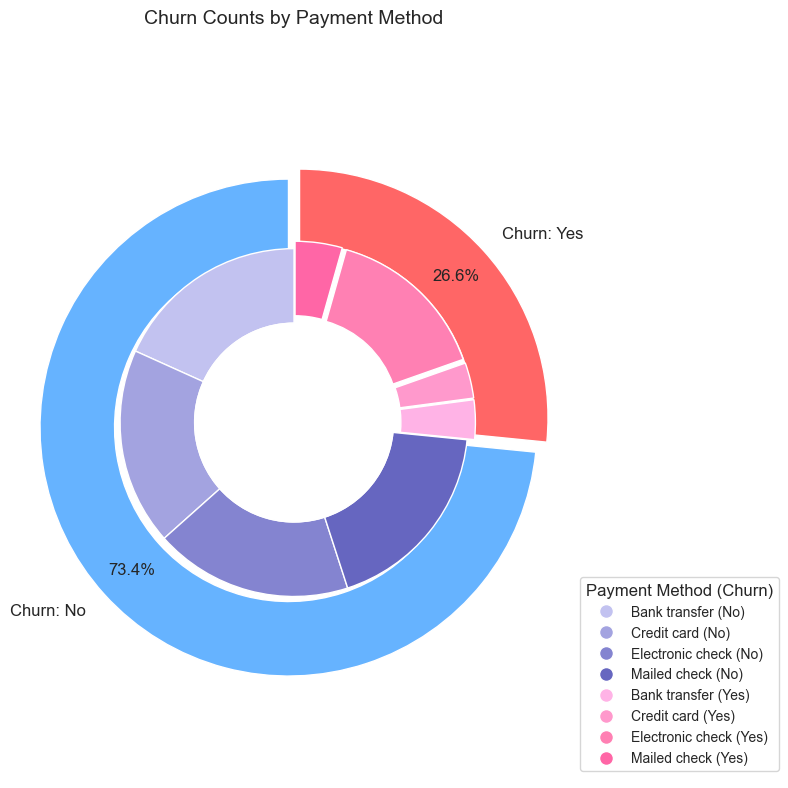

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Outer pie: total churn yes/no
labels_churn = ["Churn: No", "Churn: Yes"]
values_churn = [1284 + 1289 + 1294 + 1296, 258 + 232 + 1071 + 308]
colors_churn = ['#66b3ff', '#ff6666']
explode_churn = (0.3, 0.3)
textprops = {"fontsize": 12}

# Inner pie: payment method distribution within churn No and Yes separately
sizes_no = [1284, 1289, 1294, 1296]
sizes_yes = [258, 232, 1071, 308]

colors_no = ['#c2c2f0', '#a3a3e0', '#8484d0', '#6666c0']
colors_yes = ['#ffb3e6', '#ff99cc', '#ff80b3', '#ff66a6']

sizes_payment = sizes_no + sizes_yes
labels_payment = ["Bank transfer (No)", "Credit card (No)", "Electronic check (No)", "Mailed check (No)",
                  "Bank transfer (Yes)", "Credit card (Yes)", "Electronic check (Yes)", "Mailed check (Yes)"]
colors_payment = colors_no + colors_yes
explode_payment = (0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.3, 0.3)  # Slightly explode Yes slices

# Plot outer pie chart without labels inside
plt.pie(
    values_churn,
    labels=labels_churn,  # No labels inside
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=colors_churn,
    startangle=90,
    explode=explode_churn,
    radius=10,
    textprops=textprops,
    counterclock=True,
    wedgeprops=dict(width=3, edgecolor='w')
)

# Plot inner pie chart without labels inside
plt.pie(
    sizes_payment,
    labels=None,  # No labels inside
    colors=colors_payment,
    startangle=90,
    explode=explode_payment,
    radius=7,
    textprops=textprops,
    counterclock=True,
    wedgeprops=dict(width=3, edgecolor='w')
)

# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Counts by Payment Method', fontsize=14, y=1.05)
plt.axis('equal')

# Clear previous legends
plt.gca().legend_.remove() if plt.gca().legend_ else None

# Add churn legend with correct colors
churn_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels_churn[i],
                            markerfacecolor=colors_churn[i], markersize=15) for i in range(len(labels_churn))]
plt.legend(handles=churn_handles, loc='upper left', bbox_to_anchor=(1, 1), title="Churn Status", fontsize=12)

# Add payment method legend with correct colors
payment_handles = [plt.Line2D([0], [0], marker='o', color='w', label=labels_payment[i],
                              markerfacecolor=colors_payment[i], markersize=10) for i in range(len(labels_payment))]
plt.legend(handles=payment_handles, loc='lower left', bbox_to_anchor=(1, 0), title="Payment Method (Churn)", fontsize=10)

plt.tight_layout()
plt.show()


In [255]:
num_electronic_payment = df[df['PaymentMethod'] == 'Electronic check'].shape[0]
print(f"Number of customers with electronic payment method: {num_electronic_payment}")

Number of customers with electronic payment method: 2365


In [256]:
contract_churn_percentage = df.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


In [257]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [258]:
Dependents_churn_percentage = df.groupby('Dependents')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by dependent Type:")
print(Dependents_churn_percentage)

Churn percentage by dependent Type:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


In [259]:
partner_churn_percentage = df.groupby('Partner')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by partner Type:")
print(partner_churn_percentage)

Churn percentage by partner Type:
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


In [260]:
# Calculate the percentage of customers with/without dependents based on whether they have a partner
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack(fill_value=0)
partner_totals = partner_dependents.sum(axis=1)
partner_dependents_percentage = partner_dependents.div(partner_totals, axis=0) * 100

print("Percentage of customers with/without dependents based on whether they have a partner:")
print(partner_dependents_percentage)

Percentage of customers with/without dependents based on whether they have a partner:
Dependents         No        Yes
Partner                         
No          90.134652   9.865348
Yes         48.717949  51.282051


In [261]:
fig = px.bar(
  partner_dependents_percentage.reset_index(),
  x="Partner",
  y=["No", "Yes"],
  labels={"value": "Percentage", "Partner": "Has Partner", "variable": "Has Dependents"},
  title="Percentage of Customers With/Without Dependents Based on Partner Status",
  barmode="stack",
  text_auto='.2f'
)
fig.update_layout(
  yaxis_title="Percentage",
  xaxis_title="Partner",
  legend_title="Dependents",
  width=700,
  height=500
)
fig.show()

In [262]:
Senior_churn_percentage = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Senior Citizen Type:")
print(Senior_churn_percentage)

Churn percentage by Senior Citizen Type:
Churn                 No        Yes
SeniorCitizen                      
No             76.349745  23.650255
Yes            58.318739  41.681261


In [263]:
# Filter for senior citizens with dependents
senior_with_dependents = df[(df['SeniorCitizen'] == 'Yes') & (df['Dependents'] == 'Yes')]
num_senior_with_dependents = senior_with_dependents.shape[0]

# Total number of senior citizens
total_senior = df[df['SeniorCitizen'] == 'Yes'].shape[0]

# Percentage calculation
percentage_senior_with_dependents = (num_senior_with_dependents / total_senior) * 100 if total_senior > 0 else 0

print(f"Number of senior citizens with dependents: {num_senior_with_dependents}")
print(f"Percentage of senior citizens with dependents: {percentage_senior_with_dependents:.2f}%")

Number of senior citizens with dependents: 91
Percentage of senior citizens with dependents: 7.97%


In [264]:
# Number of senior citizens with a partner
senior_with_partner = df[(df['SeniorCitizen'] == 'Yes') & (df['Partner'] == 'Yes')]
num_senior_with_partner = senior_with_partner.shape[0]

# Percentage calculation
percentage_senior_with_partner = (num_senior_with_partner / total_senior) * 100 if total_senior > 0 else 0

print(f"Number of senior citizens with a partner: {num_senior_with_partner}")
print(f"Percentage of senior citizens with a partner: {percentage_senior_with_partner:.2f}%")

Number of senior citizens with a partner: 573
Percentage of senior citizens with a partner: 50.18%


In [265]:
online_security_churn_percentage = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by online securityType:")
print(online_security_churn_percentage)

Churn percentage by online securityType:
Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


In [266]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [267]:
contract_churn_percentage = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Contract Type:")
print(contract_churn_percentage)

Churn percentage by Contract Type:
Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


In [268]:
# Calculate the percentage of PaperlessBilling='Yes' among customers with PaymentMethod='Mailed check'
mailed_check_total = df[df['PaymentMethod'] == 'Mailed check'].shape[0]
mailed_check_paperless_yes = df[(df['PaymentMethod'] == 'Mailed check') & (df['PaperlessBilling'] == 'Yes')].shape[0]
percentage_paperless_yes_mailed_check = (mailed_check_paperless_yes / mailed_check_total) * 100

print(f"Percentage of PaperlessBilling='Yes' among Mailed check payment: {percentage_paperless_yes_mailed_check:.2f}%")

Percentage of PaperlessBilling='Yes' among Mailed check payment: 40.84%


In [269]:
num_paperless_billing = df[df['PaperlessBilling'] == 'Yes'].shape[0]
num_online_security = df[df['OnlineSecurity'] == 'Yes'].shape[0]

print(f"Number of customers with Paperless Billing: {num_paperless_billing}")
print(f"Number of customers with Online Security: {num_online_security}")

Number of customers with Paperless Billing: 4168
Number of customers with Online Security: 2015


In [270]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [271]:
techsupport_churn_percentage = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Tech Support Type:")
print(techsupport_churn_percentage)

Churn percentage by Tech Support Type:
Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


In [272]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [273]:
phoneservice_churn_percentage = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by phone service Type:")
print(phoneservice_churn_percentage)

Churn percentage by phone service Type:
Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


In [274]:
multilines_churn_percentage = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Multiple Lines Type:")
print(multilines_churn_percentage)

Churn percentage by Multiple Lines Type:
Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


In [275]:
onlinebackup_churn_percentage = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by online backup Type:")
print(onlinebackup_churn_percentage)

Churn percentage by online backup Type:
Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


In [276]:
deviceprotection_churn_percentage = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by Device Protection Type:")
print(deviceprotection_churn_percentage)

Churn percentage by Device Protection Type:
Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


In [277]:
streamingTV_churn_percentage = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by StreamingTV Type:")
print(streamingTV_churn_percentage)

Churn percentage by StreamingTV Type:
Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


In [278]:
streamingMovies_churn_percentage = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).mul(100).unstack()

print("Churn percentage by streaming movies Type:")
print(streamingMovies_churn_percentage)

Churn percentage by streaming movies Type:
Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


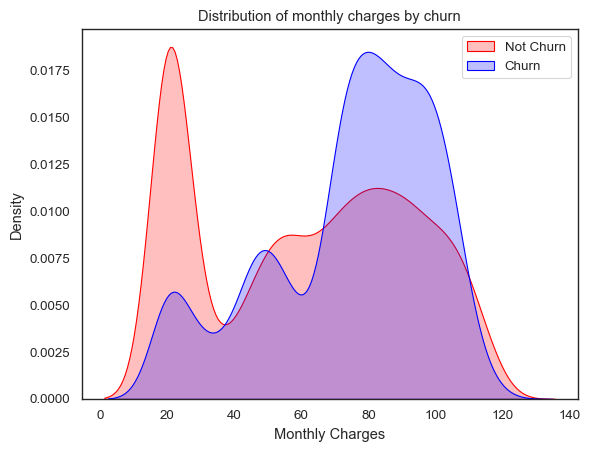

In [279]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


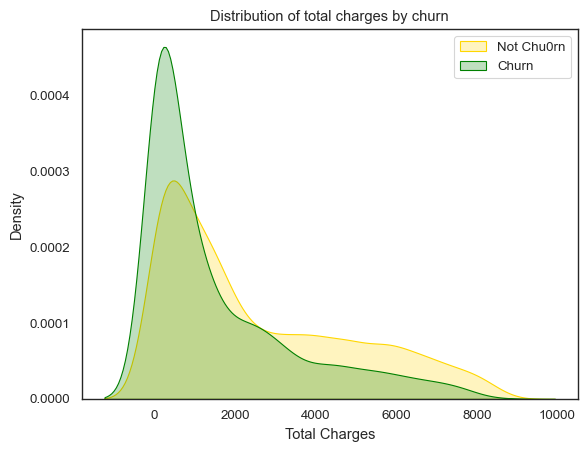

In [280]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [281]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


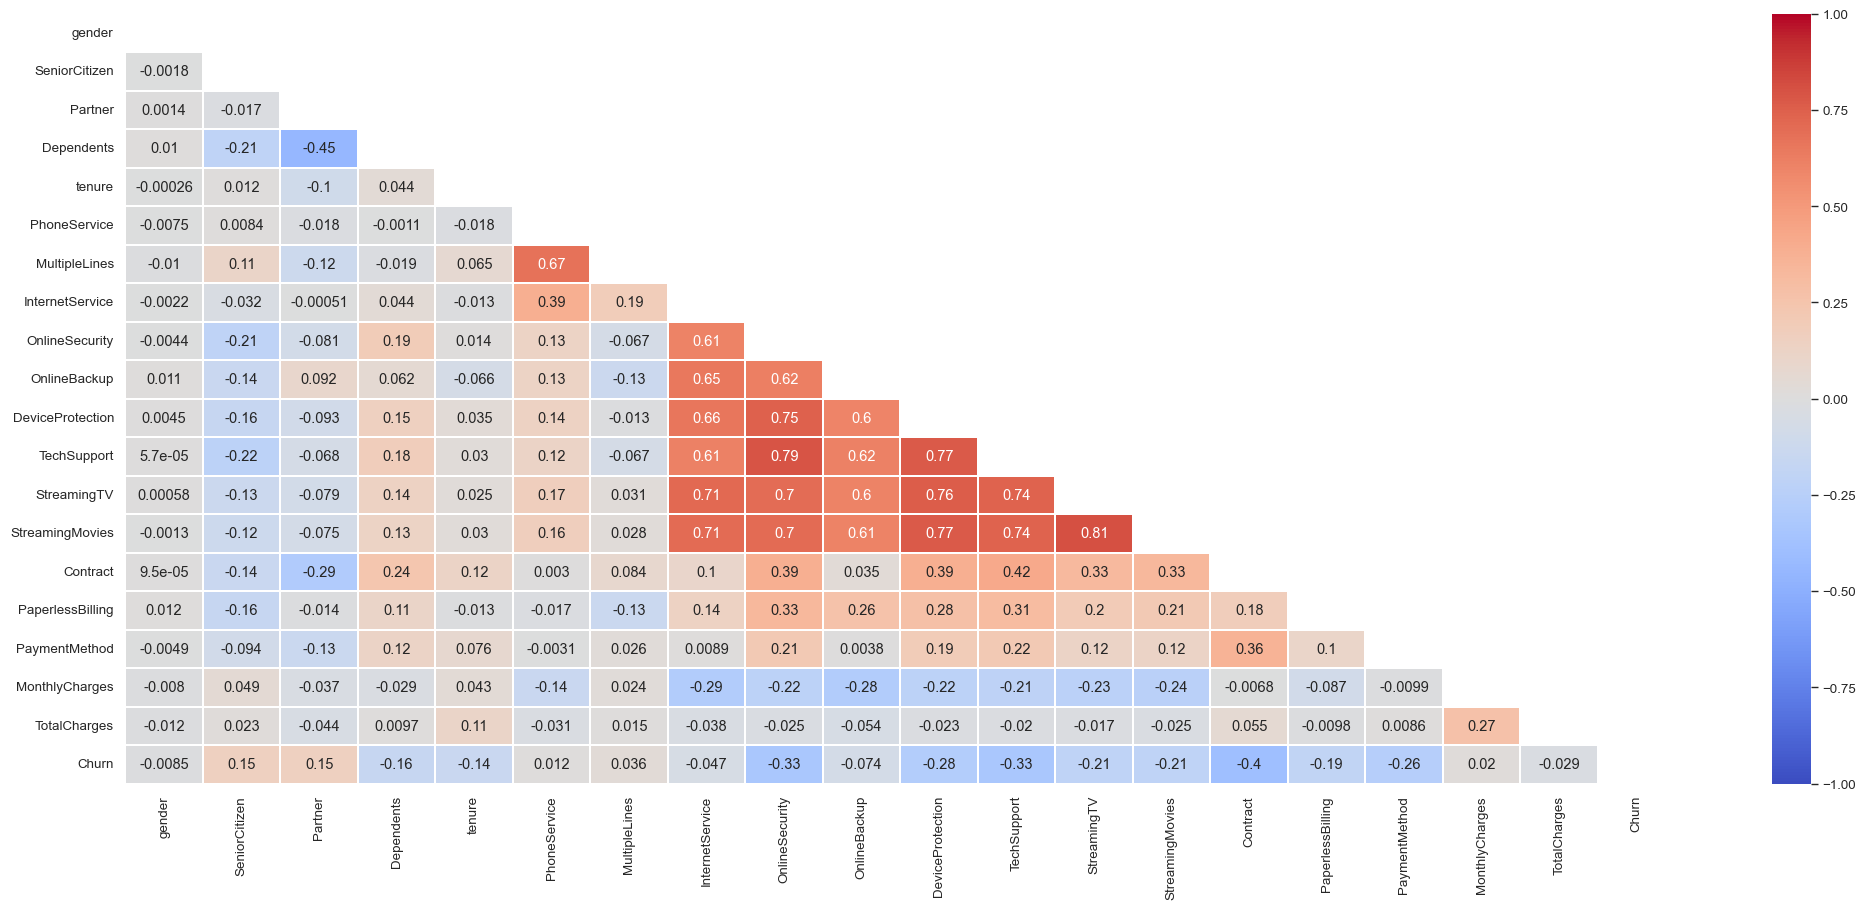

In [282]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [283]:
#df.Acquisition = (df['tenure'] <= 3)
#Churn = df.Churn.value_counts().values
#Acquisition = df.Acquisition.value_counts().values
#index = ['No', 'Yes']
#pd.DataFrame({'Churn':Churn, 'Acquisition':Acquisition}, index=index).plot(kind='bar', figsize=(10, 5), title='Churn vs Acquisition', color=['#66b3ff', '#ff6666'])

In [284]:
dependent   = ['Churn']
identifier  = ['CustomerID']
numerical   = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = [col for col in df.columns if col not in numerical + dependent + identifier]

internet_add_on = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phone_add_on = ['MultipleLines']


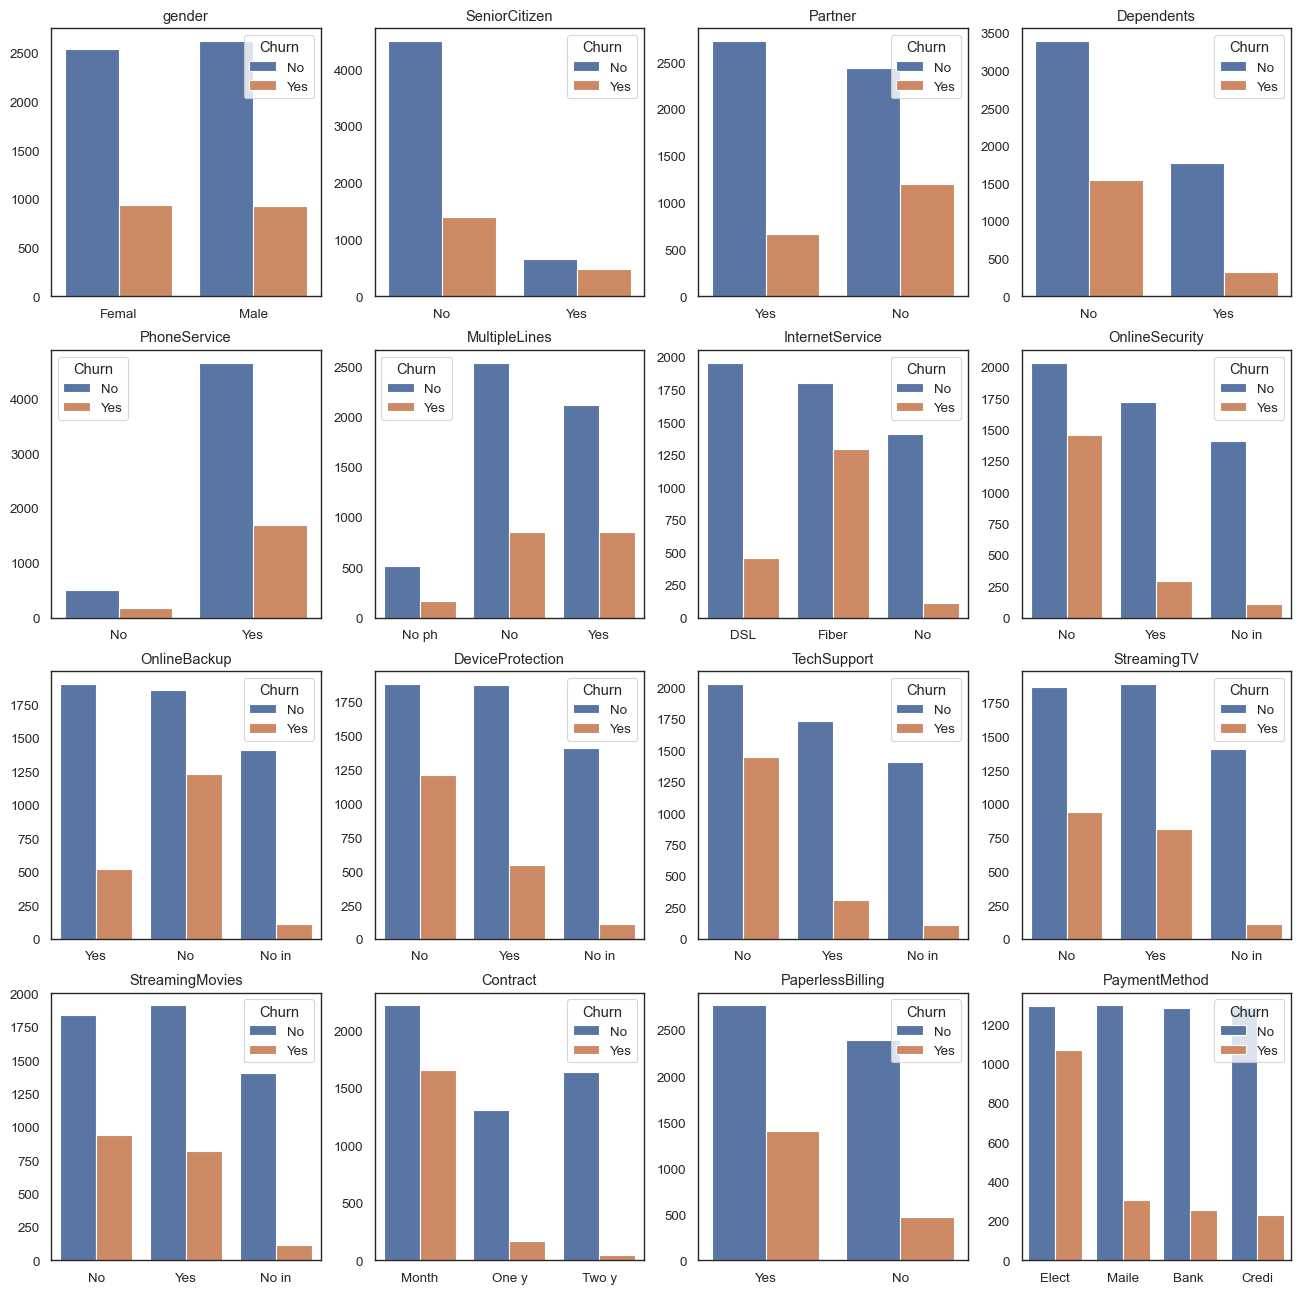

In [285]:
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (16, 16))
# Selecting and plotting the data, inputting them into the matrix.
for i, item in enumerate(categorical):
    if item in internet_add_on: 
        df1 = df[df['InternetService'] != 'No']
    elif item in phone_add_on: 
        df1 = df[df['PhoneService'] != 'No']
    else: df = df
    if i < 4:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[0, i])
    elif i >=4 and i < 8:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[1, i-4])
    elif i >=8 and i < 12:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[2, i-8])
    elif i < 16:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[3, i-12])
# Limiting characters to 5 and setting the title on top.
    ax.set_title(item)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels(item.get_text()[:5] for item in
    ax.get_xticklabels())

In [286]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [292]:
# Check required columns exist
df[['PaperlessBilling', 'PaymentMethod', 'InternetService', 'MonthlyCharges']].head()
df[df['PaperlessBilling'] == 'Yes']['MonthlyCharges'].describe()
df.groupby('PaperlessBilling')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaperlessBilling,,,,,,,,
No,2864.0,52.025960,29.705423,18.25,20.45,50.2,78.20,118.60
Yes,4168.0,73.574532,27.052794,18.55,54.95,79.5,94.95,118.75


In [293]:
df[df['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].describe()
df.groupby('PaymentMethod')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,,,,,,,,
Bank transfer (automatic),1542.0,67.205577,30.572447,18.40,41.0625,73.250,92.9875,118.75
Credit card (automatic),1521.0,66.519264,30.621316,18.25,38.6000,73.050,90.8500,117.50
Electronic check,2365.0,76.255814,24.053655,18.85,60.1500,80.550,94.7000,118.65
Mailed check,1604.0,43.958354,26.318624,18.70,20.1500,34.875,64.9125,118.60


In [294]:
df[df['InternetService'].isin(['DSL', 'Fiber optic'])].groupby('InternetService')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
InternetService,,,,,,,,
DSL,2416.0,58.088017,16.266167,23.45,46.0875,56.150,69.8625,94.80
Fiber optic,3096.0,91.500129,12.663039,67.75,80.5500,91.675,101.1500,118.75


In [295]:
filtered_df = df[
    (df['PaperlessBilling'] == 'Yes') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['InternetService'].isin(['DSL', 'Fiber optic']))
]

filtered_df['MonthlyCharges'].describe()


count    1692.000000
mean       81.238416
std        20.367404
min        23.450000
25%        70.287500
50%        84.775000
75%        96.212500
max       118.650000
Name: MonthlyCharges, dtype: float64

In [301]:
# Calculate average monthly charges for each category
mean_monthly_charges = {
    'Paperless Billing (Yes)': df[df['PaperlessBilling'] == 'Yes']['MonthlyCharges'].mean(),
    'Paperless Billing (No)': df[df['PaperlessBilling'] == 'No']['MonthlyCharges'].mean(),
    'Payment: Electronic Check': df[df['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].mean(),
    'Internet: DSL': df[df['InternetService'] == 'DSL']['MonthlyCharges'].mean(),
    'Internet: Fiber Optic': df[df['InternetService'] == 'Fiber optic']['MonthlyCharges'].mean()
}

# Convert to DataFrame
charges_df = pd.DataFrame({
    'Category': list(mean_monthly_charges.keys()),
    'MeanMonthlyCharges': list(mean_monthly_charges.values())
})

# Create bar chart
fig = px.bar(
    charges_df,
    x='Category',
    y='MeanMonthlyCharges',
    title='Average Monthly Charges by Customer Category',
    text_auto='.2f',
    labels={'MeanMonthlyCharges': 'Mean Monthly Charges ($)', 'Category': 'Customer Category'},
    color='Category'
)

fig.update_layout(
    xaxis_tickangle=-30,
    width=800,
    height=500,
    showlegend=False,
    yaxis=dict(title='Average Monthly Charges ($)'),
    xaxis=dict(title='Customer Category')
)

fig.show()


In [306]:
import pandas as pd
import plotly.express as px

# Define extra services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# 1️⃣ Internet only (no extras)
internet_only = df[
    (df['InternetService'] != 'No') &
    df[services].eq('No').all(axis=1)
]
avg_internet_only = internet_only['MonthlyCharges'].mean()

# 2️⃣ No Internet
no_internet = df[df['InternetService'] == 'No']
avg_no_internet = no_internet['MonthlyCharges'].mean()

# 3️⃣ All Internet Users
internet_users = df[df['InternetService'] != 'No']
avg_all_internet = internet_users['MonthlyCharges'].mean()

# 4️⃣ Internet users with at least 1 extra service
internet_with_services = df[
    (df['InternetService'] != 'No') &
    df[services].eq('Yes').any(axis=1)
]
avg_with_extras = internet_with_services['MonthlyCharges'].mean()

# Build data
services_data = {
    'Service': [
        'Internet Only (No Extras)',
        'Internet + ≥1 Extra Service',
        'Internet Users (Any Type)',
        'No Internet'
    ],
    'AvgMonthlyCharge': [
        avg_internet_only,
        avg_with_extras,
        avg_all_internet,
        avg_no_internet
    ]
}

# Add individual services
for service in services:
    avg_charge = df[df[service] == 'Yes']['MonthlyCharges'].mean()
    services_data['Service'].append(service)
    services_data['AvgMonthlyCharge'].append(avg_charge)

# Convert to DataFrame
comparison_df = pd.DataFrame(services_data)

# 📊 Plotly Bar Chart
fig = px.bar(
    comparison_df,
    x='Service',
    y='AvgMonthlyCharge',
    title='Average Monthly Charges: Internet Services & Extras',
    text_auto='.2f',
    labels={
        'AvgMonthlyCharge': 'Average Monthly Charge ($)',
        'Service': 'Customer Group'
    },
    color='Service'
)

fig.update_layout(
    xaxis_title='Customer Group',
    yaxis_title='Avg Monthly Charge ($)',
    width=1050,
    height=600,
    showlegend=False
)

fig.show()


In [307]:
import pandas as pd
import plotly.express as px

# Define extra services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count No Internet users
no_internet_count = df[df['InternetService'] == 'No'].shape[0]

# Internet users
internet_users = df[df['InternetService'] != 'No']

# Among internet users — Internet Only (no extra services)
internet_only_count = internet_users[internet_users[services].eq('No').all(axis=1)].shape[0]

# Among internet users — With at least 1 extra service
internet_with_services_count = internet_users[internet_users[services].eq('Yes').any(axis=1)].shape[0]

# Combine all
labels = [
    'No Internet',
    'Internet Only (No Extras)',
    'Internet + ≥1 Extra Service'
]
values = [
    no_internet_count,
    internet_only_count,
    internet_with_services_count
]

# Plotly Donut Chart
fig = px.pie(
    names=labels,
    values=values,
    title="Customer Internet Usage & Service Adoption",
    hole=0.4,  # This creates the donut shape
    color=labels,
    color_discrete_map={
        'No Internet': '#b0bec5',
        'Internet Only (No Extras)': '#64b5f6',
        'Internet + ≥1 Extra Service': '#81c784'
    }
)

fig.update_traces(textinfo='label+percent+value', textfont_size=14)

fig.update_layout(
    width=700,
    height=600,
    legend_title="Customer Segment"
)

fig.show()


In [308]:
import plotly.express as px

# Extra services list
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# DSL users
dsl_users = df[df['InternetService'] == 'DSL']
dsl_no_service = dsl_users[dsl_users[services].eq('No').all(axis=1)].shape[0]
dsl_with_service = dsl_users[dsl_users[services].eq('Yes').any(axis=1)].shape[0]

# Fiber optic users
fiber_users = df[df['InternetService'] == 'Fiber optic']
fiber_no_service = fiber_users[fiber_users[services].eq('No').all(axis=1)].shape[0]
fiber_with_service = fiber_users[fiber_users[services].eq('Yes').any(axis=1)].shape[0]

# Combine data
labels = [
    'DSL: No Extra Services',
    'DSL: With ≥1 Extra Service',
    'Fiber: No Extra Services',
    'Fiber: With ≥1 Extra Service'
]
values = [
    dsl_no_service,
    dsl_with_service,
    fiber_no_service,
    fiber_with_service
]

# Donut chart
fig = px.pie(
    names=labels,
    values=values,
    title="Service Adoption by Internet Type (DSL vs Fiber)",
    hole=0.4,
    color=labels,
    color_discrete_map={
        'DSL: No Extra Services': '#ffcc80',
        'DSL: With ≥1 Extra Service': '#ffa726',
        'Fiber: No Extra Services': '#90caf9',
        'Fiber: With ≥1 Extra Service': '#42a5f5'
    }
)

fig.update_traces(textinfo='label+percent+value', textfont_size=13)

fig.update_layout(
    width=750,
    height=600,
    legend_title="Customer Groups"
)

fig.show()


In [309]:
# List of extra services
extra_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filter DSL users
dsl_users = df[df['InternetService'] == 'DSL']

# DSL users with at least one extra service
dsl_with_service = dsl_users[dsl_users[extra_services].eq('Yes').any(axis=1)]

# Calculate average MonthlyCharges
avg_monthly_charge_dsl_with_service = dsl_with_service['MonthlyCharges'].mean()

print(f"Average Monthly Charge for DSL users with ≥1 extra service: ${avg_monthly_charge_dsl_with_service:.2f}")


Average Monthly Charge for DSL users with ≥1 extra service: $60.56


In [310]:
# List of extra services
extra_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filter Fiber Optic users
fiber_users = df[df['InternetService'] == 'Fiber optic']

# Fiber Optic users with at least one extra service
fiber_with_service = fiber_users[fiber_users[extra_services].eq('Yes').any(axis=1)]

# Calculate average MonthlyCharges
avg_monthly_charge_fiber_with_service = fiber_with_service['MonthlyCharges'].mean()

print(f"Average Monthly Charge for Fiber Optic users with ≥1 extra service: ${avg_monthly_charge_fiber_with_service:.2f}")


Average Monthly Charge for Fiber Optic users with ≥1 extra service: $94.37


In [196]:
#def object_to_int(dataframe_series):
#    if dataframe_series.dtype=='object':
#        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#    return dataframe_series

In [197]:
#df = df.apply(lambda x: object_to_int(x))
#df.head()